In [10]:
#------------------------
# Libraries and files to import
#------------------------

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import csv
from collections import Counter
from scipy.ndimage import label, find_objects, generate_binary_structure
from scipy.ndimage.morphology import binary_dilation
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
execfile("City_planner.py")

save_folder = "sim_res"

C:\Users\HP\AppData\Local\Temp\ipykernel_25512\41549537.py:13: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_dilation
City_planner.py:9: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_dilation


City_planner.py:104: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  retgrid[i,j] = [increase_param,1]


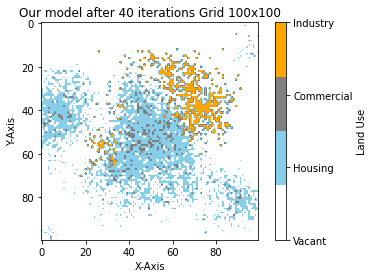

In [8]:
#------------------------
#Basic Simulation run for our model
#------------------------

#Parameter Definition 
time = 30
grid_size = 75
cust_cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'grey', 'orange'])

#Actual Calculation
solution_dev = simulate_CA_city(grid_size,time,alpha = 2.2, amplify_c=5, amplify_i=200)

simulate_CA_city()
#Plotting
base_sol_plot = plt.imshow(solution_dev[time-1,:,:,0], vmin = 0, vmax = 3, cmap = cust_cmap)
cbar = plt.colorbar(ticks=[0,1,2, 3], label='Land Use')
cbar.set_ticklabels(['Vacant','Housing','Commercial', 'Industry'])
plt.title("Our model after 40 iterations Grid "+grid_size+"x"+grid_size)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

In [16]:
#------------------------
#creating a run with differing alpha and c_groth values
#------------------------

#Parameter Definition
time = 20
grid_size = 50
simulation_grid_repeats = 2
alpha_start = 0
alpha_stop = 4
alpha_step = (alpha_stop-alpha_start)/(simulation_grid_repeats-1)
simulation_results_grid = np.zeros((simulation_grid_repeats,simulation_grid_repeats,grid_size,grid_size)).astype(np.int8)
growth_arr = np.arange(-1,4.01,5/(simulation_grid_repeats-1))


#loop over 2^x scale for commercial growth rate 0.25-256
for i in range(simulation_grid_repeats):
    c_growth = 2**growth_arr[i]
    print(c_growth)
    
    #Loop over  alpha from 0.0 to 3.0 in 0.333 steps
    for j,loc_alpha in enumerate(np.arange(alpha_start,alpha_stop+0.01,alpha_step)):
        
        #Actual Simulation
        simulation_results_grid[i][j] = simulate_CA_city(grid_size,time,alpha = loc_alpha, amplify_c=c_growth)[time-1,:,:,0]
        
        #Saving the files
        with open(save_folder+'/alpha_%.2f' % loc_alpha +'_c_growth_%.2f' % c_growth+'v3.csv', 'w',encoding="utf8") as f:
            writer = csv.writer(f)
            for row in simulation_results_grid[i][j]:
                rowhandle = ','.join(str(int(x)) for x in row)
                writer.writerow(rowhandle)

0.5


City_planner.py:104: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  retgrid[i,j] = [increase_param,1]


16.0


In [17]:
#------------------------
#OPTIONAL!! Load the data from savefiles
#------------------------

#remove following """ to run the code

"""


#Parameter Definition
time = 20
grid_size = 
simulation_grid_repeats = 2
alpha_start = 0
alpha_stop = 4
alpha_step = (alpha_stop-alpha_start)/(simulation_grid_repeats-1)
simulation_results_grid = np.zeros((simulation_grid_repeats,simulation_grid_repeats,grid_size,grid_size)).astype(np.int8)
growth_arr = np.arange(-1,4.01imulation_grid_repeats-1))

#loop over 2^x scale for commercial growth rate 0.25-256
for i in range(simulation_grid_repeats):
    c_growth = 2**growth_arr[i]
    
    #Loop over  alpha from 0.0 to 3.0 in 0.333 steps
    for j,loc_alpha in enumerate(np.arange(alpha_start,alpha_stop+0.01,alpha_step)):
        
        #Load the data
        with open(save_folder+'/alpha_%.2f' % loc_alpha +'_c_growth_%.2f' % c_growth+'v3.csv', 'r',encoding="utf8") as f:
            data_raw = list(csv.reader(f))
            data = np.empty((grid_size,grid_size))
            reduce = 0
            for k,row in enumerate(data_raw):
                if row != []:
                    data[k-reduce] = list(filter(lambda character: character != ',', row))
                else:
                    reduce +=1
            simulation_results_grid[i,j,:,:]= data
#"""

'\n\n\n#Parameter Definition\ntime = 20\ngrid_size = 75\nsimulation_grid_repeats = 2\nalpha_start = 0\nalpha_stop = 4\nalpha_step = (alpha_stop-alpha_start)/(simulation_grid_repeats-1)\nsimulation_results_grid = np.zeros((simulation_grid_repeats,simulation_grid_repeats,grid_size,grid_size)).astype(np.int8)\ngrowth_arr = np.arange(-1,4,5/(simulation_grid_repeats-1))\n\n#loop over 2^x scale for commercial growth rate 0.25-256\nfor i in range(simulation_grid_repeats):\n    c_growth = 2**growth_arr[i]\n    \n    #Loop over  alpha from 0.0 to 3.0 in 0.333 steps\n    for j,loc_alpha in enumerate(np.arange(alpha_start,alpha_stop+0.01,alpha_step)):\n        \n        #Load the data\n        with open(save_folder+\'/alpha_%.2f\' % loc_alpha +\'_c_growth_%.2f\' % c_growth+\'v3.csv\', \'r\',encoding="utf8") as f:\n            data_raw = list(csv.reader(f))\n            data = np.empty((grid_size,grid_size))\n            reduce = 0\n            for k,row in enumerate(data_raw):\n                if

In [18]:
#------------------------
#Perform a fractal dimension and conditional entropy analysis on the data
#------------------------

#Alocate the variables
heat_map_fr_dim_probabilistic = np.zeros((simulation_grid_repeats,simulation_grid_repeats,2))
heat_map_cond_ent_probabilistic = np.zeros((simulation_grid_repeats,simulation_grid_repeats))

#loop over 2^x scale for commercial growth rate
for i in range(simulation_grid_repeats):
    
    #Loop over  alpha
    for j in range(simulation_grid_repeats):
        #calculate Fractal Dimension
        heat_map_fr_dim_probabilistic[i][j] = fractal_dimension( simulation_results_grid[i][j])[0]
        
        #Calculate Conditional entropy
        heat_map_cond_ent_probabilistic[i][j] = conditional_entropy( simulation_results_grid[i][j])


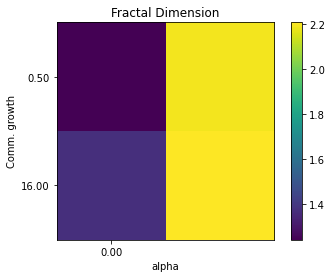

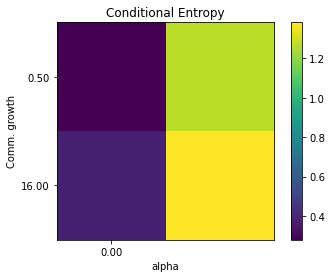

In [19]:
#------------------------
#plot the fractional dimension and conditional entropy Analysis
#------------------------

#Plot Fractal dimension
fr_dim_plt = plt.imshow(heat_map_fr_dim_probabilistic[:,:,0])
plt.title("Fractal Dimension")
plt.xlabel("alpha")
plt.xticks(list(range(simulation_grid_repeats))[::5], ['%.2f' % alph for alph in np.arange(alpha_start,alpha_stop+0.01,alpha_step)][::5])
plt.ylabel("Comm. growth")
plt.yticks(list(range(simulation_grid_repeats)), ['%.2f' % 2**i for i in growth_arr])
plt.colorbar(fr_dim_plt)
plt.show()

#Plot conditional entropy
cond_ent_plt = plt.imshow(heat_map_cond_ent_probabilistic)
plt.title("Conditional Entropy")
plt.xlabel("alpha")
plt.xticks(list(range(simulation_grid_repeats))[::5], ['%.2f' % alph for alph in np.arange(alpha_start,alpha_stop+0.01,alpha_step)][::5])
plt.ylabel("Comm. growth")
plt.yticks(list(range(simulation_grid_repeats)), ['%.2f' % 2**i for i in growth_arr])
plt.colorbar(cond_ent_plt)
plt.show()